<a href="https://colab.research.google.com/github/Vaibhavgoel123/Artificial-Intelligence/blob/Projects/Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
print(tf.__version__)

2.19.0


# New Section

MNIST dataset is the famous dataset to train the model so that it can understand the images or the data provided to it.

In [29]:
mnist = tf.keras.datasets.fashion_mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print(training_labels)
print(training_labels.shape)

[9 0 0 ... 3 0 5]
(60000,)


In [32]:
print(test_labels)
print(test_labels.shape)

[9 2 1 ... 8 1 5]
(10000,)


0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

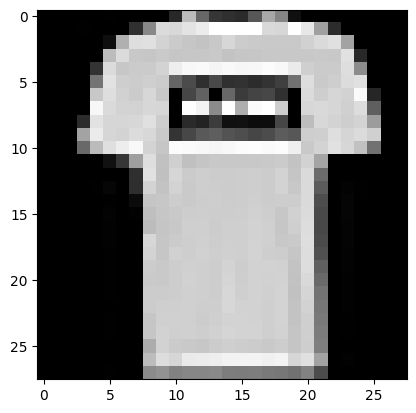

In [33]:
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1])

For easier calculations we divide the data by 255 which is the highest value of any pixel color so as to simplify the numerical values to avoid complex and large scale calculations.

In [34]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [35]:
print(training_images[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

Training a sequential model with 2048 neurons in first layer with ReLU activation function to avoid non-linearity problem and softmax as activation function with 10 neurons in output layer because it works on probablities so the difference between values doesn't become a problem.

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2048,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Adam optimizer is used to adjust the weights automatically.   
It combines the advantages of:
- RMS prop
- Momentum

sparse_categorical_crossentropy is used especially in cases where we have multiple classes to calculate loss.

In [37]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7978 - loss: 0.5715
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8629 - loss: 0.3730
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8776 - loss: 0.3276
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8904 - loss: 0.2942
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8959 - loss: 0.2771


In [38]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8781 - loss: 0.3421


[0.34402167797088623, 0.8781999945640564]

In [39]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[4.2087756e-08 1.6720730e-07 3.5391270e-07 4.1277701e-09 7.0197423e-08
 9.5744587e-02 6.6779415e-07 2.8546257e-02 3.0307046e-08 8.7570786e-01]


In [40]:
print(test_labels[1])

2


In [41]:
print(test_labels)

[9 2 1 ... 8 1 5]


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


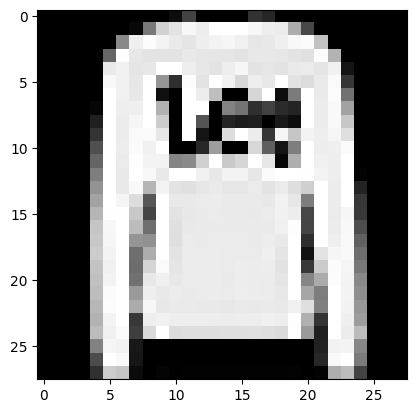

In [42]:
print(test_images)
plt.imshow(test_images[1])

In [54]:
#Convolutional neural netowrks and try to make computer vision
import cv2
import numpy as np
from scipy.datasets import ascent #It returns a famous grayscale test image used for image processing experiments.
i=ascent().astype(np.int32)

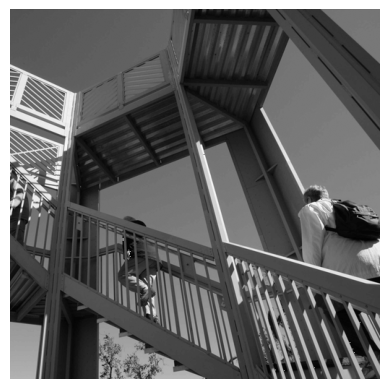

In [55]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [56]:
i_transformed=np.copy(i).astype(np.int32)
size_x=i_transformed.shape[0]
size_y=i_transformed.shape[1]
print(size_x)
print(size_y)

512
512


Weight is set to 1 instead of sum of filter values so as to avoid **Zero Division Error**.

In [57]:
filter = [[0,1,0],[1,-4,1],[0,1,0]]
weight = 1

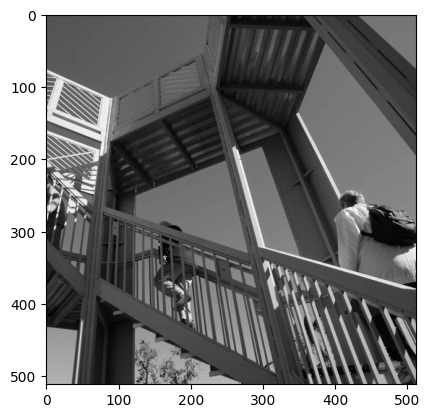

In [58]:
plt.imshow(i)

In [59]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    output_pixel=0.0
    output_pixel=output_pixel+i[x-1,y-1]*filter[0][0]
    output_pixel=output_pixel+i[x-1,y]*filter[0][1]
    output_pixel=output_pixel+i[x-1,y+1]*filter[0][2]
    output_pixel=output_pixel+i[x,y-1]*filter[1][0]
    output_pixel=output_pixel+i[x,y]*filter[1][1]
    output_pixel=output_pixel+i[x,y+1]*filter[1][2]
    output_pixel=output_pixel+i[x+1,y-1]*filter[2][0]
    output_pixel=output_pixel+i[x+1,y]*filter[2][1]
    output_pixel=output_pixel+i[x+1,y+1]*filter[2][2]
    output_pixel = output_pixel*weight
    if output_pixel<0:
      output_pixel=0
    if output_pixel>255:
      output_pixel=255
    i_transformed[x,y]=int(output_pixel)

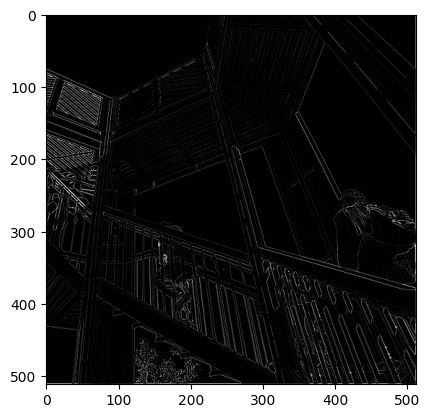

In [60]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

In [61]:
#Understanding Pooling

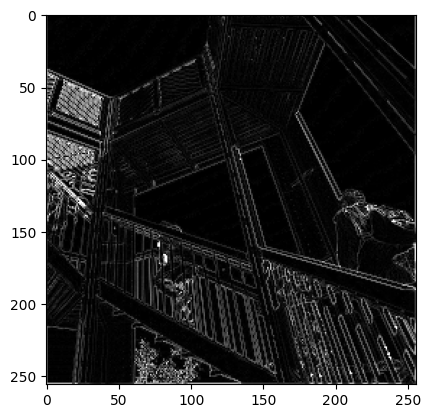

In [62]:
new_x=int(size_x/2)
new_y=int(size_y/2)
newImage=np.zeros((new_x,new_y))
for x in range(0,size_x,2):
  for y in range(0,size_y,2):
    pixels=[]
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)]=pixels[0]

#Plot the image
#The size of the pixels is now 256 instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [63]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=7)
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print('Test loss: {},Test accuracy: {}'.format(test_loss*100,test_accuracy*100))

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7842 - loss: 0.6281
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.3815
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8759 - loss: 0.3379
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8876 - loss: 0.3072
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8913 - loss: 0.2928
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8969 - loss: 0.2772
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8982 - loss: 0.2668
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8824 - loss: 0.3268
Test loss: 33.100903034210205,Test accuracy: 88.27999830245972


In [64]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=7)
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print('Test loss: {},Test accuracy: {}'.format(test_loss*100,test_accuracy*100))

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7810 - loss: 0.6272
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.3879
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.3446
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8854 - loss: 0.3150
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8913 - loss: 0.2943
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8949 - loss: 0.2795
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8994 - loss: 0.2711
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3336
Test loss: 33.629781007766724,Test accuracy: 88.23999762535095


In [65]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')

])
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print('Test loss: {},Test accuracy: {}'.format(test_loss*100,test_accuracy*100))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7827 - loss: 0.6004
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.8876 - loss: 0.3045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9085 - loss: 0.2492
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9195 - loss: 0.2179
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9294 - loss: 0.1887
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9017 - loss: 0.2676
Test loss: 25.933733582496643,Test accuracy: 90.2999997138977


In [66]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)